In [1]:
#importamos las bibliotecas relevantes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#URL del dataset

url = "https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv"

#Cargamos el dataset

BostonHousing = pd.read_csv(url)

#Exploración inicial

print("Información del dataset:")
BostonHousing.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  lstat       506 non-null    float64
 13  medv        506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [4]:
print("\nEstadísticas Descriptivas:")
print(BostonHousing.describe())


Estadísticas Descriptivas:
       Unnamed: 0        crim          zn       indus        chas         nox  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      0.000000    0.006320    0.000000    0.460000    0.000000    0.385000   
25%    126.250000    0.082045    0.000000    5.190000    0.000000    0.449000   
50%    252.500000    0.256510    0.000000    9.690000    0.000000    0.538000   
75%    378.750000    3.677083   12.500000   18.100000    0.000000    0.624000   
max    505.000000   88.976200  100.000000   27.740000    1.000000    0.871000   

               rm         age         dis         rad         tax     ptratio  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     6.284634   68.574901    3.795043    9.549407  408.237154   18.455534   

In [5]:
#Manejo de valores faltantes en la columna medv

print(f"Dimensiones antes de eliminar valores faltantes: {BostonHousing.shape}")
print(f"Valores faltantes en medv: {BostonHousing['medv'].isna().sum()}")

Dimensiones antes de eliminar valores faltantes: (506, 14)
Valores faltantes en medv: 0


,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [11]:
#Separamos predictores (X) de objetivo (Y)

X = BostonHousing.drop('medv', axis=1)
Y = BostonHousing['medv']

print(f"Dimensiones de X: {X.shape}")
print(f"Dimensiones de Y: {Y.shape}")

Dimensiones de X: (506, 13)
Dimensiones de Y: (506,)


In [10]:
#Estandarizamos los predictores (X)

scaler = StandardScaler()

X_escalado = scaler.fit_transform(X)

#Vemos los datos escalados

print("\nDatos Originales:", X)
print("\nDatos Escalados:", X_escalado)


Datos Originales:      Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0             0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1             1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2             2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3             3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4             4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   
..          ...      ...   ...    ...   ...    ...    ...   ...     ...  ...   
501         501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502         502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503         503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1   
504         504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1   
505         505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1   

     tax  ptratio  l

In [20]:
#Creamos el modelo LassoCV

lasso_cv = LassoCV(cv=10, random_state=42, max_iter=10000)

#Entrenamos el modelo

lasso_cv.fit(X, Y)

#Imprimimos el valor óptimo del alpha

print(f"Valor óptimo de alpha: {lasso_cv.alpha_:.4f}")

Valor óptimo de alpha: 0.7248


In [22]:
# El objeto LassoCV entrenado almacena el MSE de cada pliegue para cada alpha en el atributo .mse_path_. La forma es (n_alphas, n_folds)
mse_path = lasso_cv.mse_path_
alphas = lasso_cv.alphas_

# Calculamos el MSE promedio a través de los 10 pliegues para cada valor de alpha
mse_mean = np.mean(mse_path, axis=1)
mse_std = np.std(mse_path, axis=1)

# Encontramos el alpha con el MSE promedio más bajo
best_idx = np.argmin(mse_mean)
best_alpha = alphas[best_idx]
best_mse = mse_mean[best_idx]

print(f"Alpha con MSE promedio más bajo: {best_alpha:.4f}")
print(f"MSE promedio correspondiente: {best_mse:.2f}")
print(f"Alpha seleccionado por LassoCV: {lasso_cv.alpha_:.4f}")

Alpha con MSE promedio más bajo: 0.7248
MSE promedio correspondiente: 35.14
Alpha seleccionado por LassoCV: 0.7248


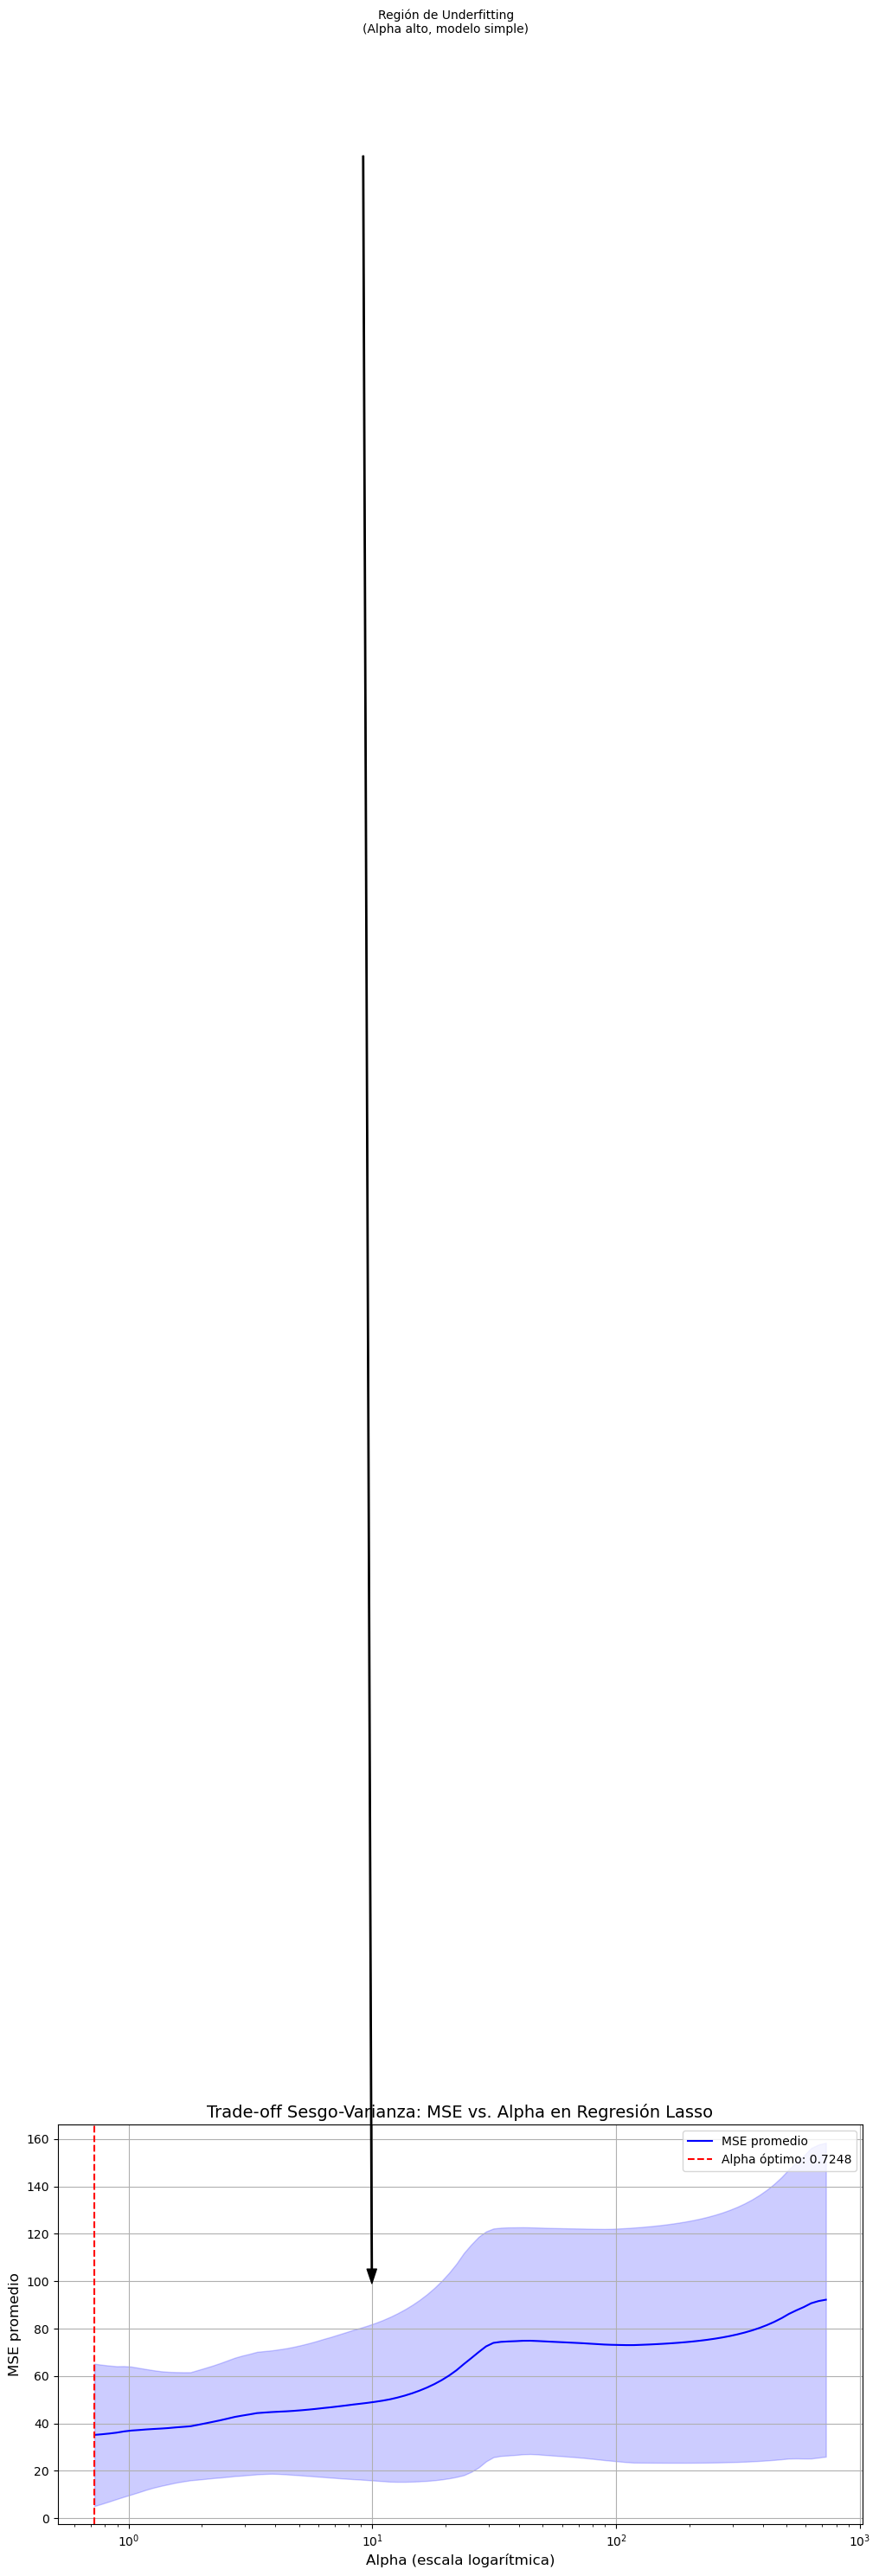

In [25]:
#Generamos un gráfico con los valores de alpha en el eje x (escala logarítmica) y el MSE promedio en el eje y

plt.figure(figsize=(12, 6))

#Graficamos el MSE promedio con su desviación estándar

plt.semilogx(alphas, mse_mean, 'b-', label='MSE promedio')
plt.fill_between(alphas, mse_mean - mse_std, mse_mean + mse_std, alpha=0.2, color='blue')

## Marcamos el alpha óptimo
plt.axvline(x=lasso_cv.alpha_, color='r', linestyle='--', 
            label=f'Alpha óptimo: {lasso_cv.alpha_:.4f}')

# Configuramos el gráfico
plt.title('Trade-off Sesgo-Varianza: MSE vs. Alpha en Regresión Lasso', fontsize=14)
plt.xlabel('Alpha (escala logarítmica)', fontsize=12)
plt.ylabel('MSE promedio', fontsize=12)
plt.grid(True)
plt.legend()

# Añadimos anotaciones para explicar las regiones
plt.annotate('Región de Underfitting\n(Alpha alto, modelo simple)',
             xy=(10, mse_mean[np.argmin(np.abs(alphas - 10))]),
             xytext=(20, mse_mean[np.argmin(np.abs(alphas - 10))] + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, ha='center')

plt.annotate('Región de Overfitting\n(Alpha bajo, modelo complejo)',
             xy=(0.01, mse_mean[np.argmin(np.abs(alphas - 0.01))]),
             xytext=(0.05, mse_mean[np.argmin(np.abs(alphas - 0.01))] + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
             fontsize=10, ha='center')

# Mostramos el gráfico

plt.show()

#Un alpha alto significa que hay una fuerte penalización por hacer modelos complejos, lo que hará que en el entrenamiento
#del modelo el sesgo aumente y la varianza disminuya existiendo un underfitting.

#Un alpha bajo significa que hay una penalización muy baja por hacer modelos complejos, lo que hará que en el entrenamiento
#del modelo el sesgo disminuya y la varianza aumente existiendo un overfitting.